### Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, accuracy_score, classification_report,\
confusion_matrix


### Load data

In [7]:
df=pd.read_csv('/Users/guyuhui/Desktop/dataset/cardio_train.csv',delimiter=';')

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Cleaning the data

In [11]:
# Check for missing values
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

0

In [13]:
# drop id column
df.drop('id', axis= 1, inplace= True)

# change age from days to years
df['age'] = round(df['age'] / 365, 1)

In [14]:
# check heights 
df[df['height'] < 125]

# so we'll drop them
df = df[df['height'] >= 125]

In [15]:
df[df['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58.1,1,250,86.0,140,100,3,1,0,0,1,1
21628,52.2,2,207,78.0,100,70,1,1,0,1,1,0


In [16]:
# a height of 250cm (8'2") and a weight of 86kg (190lbs) seems suspicious
df.drop(index=6486, inplace= True)

In [17]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69912 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69912 non-null  float64
 1   gender       69912 non-null  int64  
 2   height       69912 non-null  int64  
 3   weight       69912 non-null  float64
 4   ap_hi        69912 non-null  int64  
 5   ap_lo        69912 non-null  int64  
 6   cholesterol  69912 non-null  int64  
 7   gluc         69912 non-null  int64  
 8   smoke        69912 non-null  int64  
 9   alco         69912 non-null  int64  
 10  active       69912 non-null  int64  
 11  cardio       69912 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


In [19]:
# find where ap_lo higher than ap_hi
df = df[df['ap_hi'] > df['ap_lo']]

# anything with systolic < 80 and diastolic < 50 is considered abnormally low
df = df[df['ap_hi'] > 80]
df = df[df['ap_lo'] > 50]

# remove any ap_hi an ap_lo readings that are abnormally high
df = df[df['ap_hi'] < 250]

# they are still lower than the systolic and match other features
df[df['ap_lo'] > 150]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4781,51.9,1,158,74.0,200,170,1,1,0,0,1,1
4981,62.3,2,173,74.0,220,160,2,2,0,0,1,1
38022,59.6,1,161,84.0,196,182,2,2,0,0,1,1
43998,62.1,2,163,70.0,200,180,1,1,0,0,0,1
54987,53.4,1,169,80.0,200,160,3,3,0,0,1,0


In [20]:
#40kg = 88lbs, this would indicate a underweight person, or a typo in the data
df = df[df['weight'] >= 40]
# reset index
df.reset_index(inplace= True, drop= True)

### Exploratory data analysis

#### BMI analysis

In [21]:
# create copy
df_eda = df.copy()

<Axes: xlabel='height', ylabel='weight'>

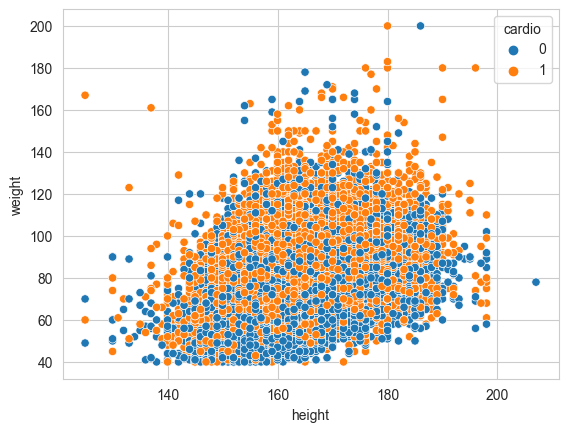

In [22]:
sns.scatterplot(x= 'height', y= 'weight', hue= 'cardio', data= df_eda)

In [23]:
# create BMI feature
def BMI (data):
    return round(data['weight'] / (data['height'] / 100) **2, 2)

df_eda['BMI'] = df_eda.apply(BMI, axis= 1)

In [24]:
df_eda.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000,68413.000000
mean,53.333130,1.349027,164.450835,74.153387,126.744961,81.366188,1.364931,1.225864,0.087966,0.053396,0.803458,0.495271,27.455421
std,6.759749,0.476666,7.842102,14.259347,16.620734,9.376343,0.679155,0.571804,0.283247,0.224824,0.397386,0.499981,5.207657
min,29.600000,1.000000,125.000000,40.000000,85.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.520000
25%,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.880000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.350000
75%,58.400000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.120000
max,65.000000,2.000000,207.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,106.880000


#### Gender analysis

In [25]:
# determine which is male/female
df_eda.groupby('gender')['height'].mean()

gender
1    161.459347
2    170.030279
Name: height, dtype: float64

In [26]:
df_eda.groupby('gender')['weight'].mean()

gender
1    72.524535
2    77.191369
Name: weight, dtype: float64

In [27]:
df_eda.gender.value_counts(normalize= True)

gender
1    0.650973
2    0.349027
Name: proportion, dtype: float64

Text(0, 0.5, 'Patients')

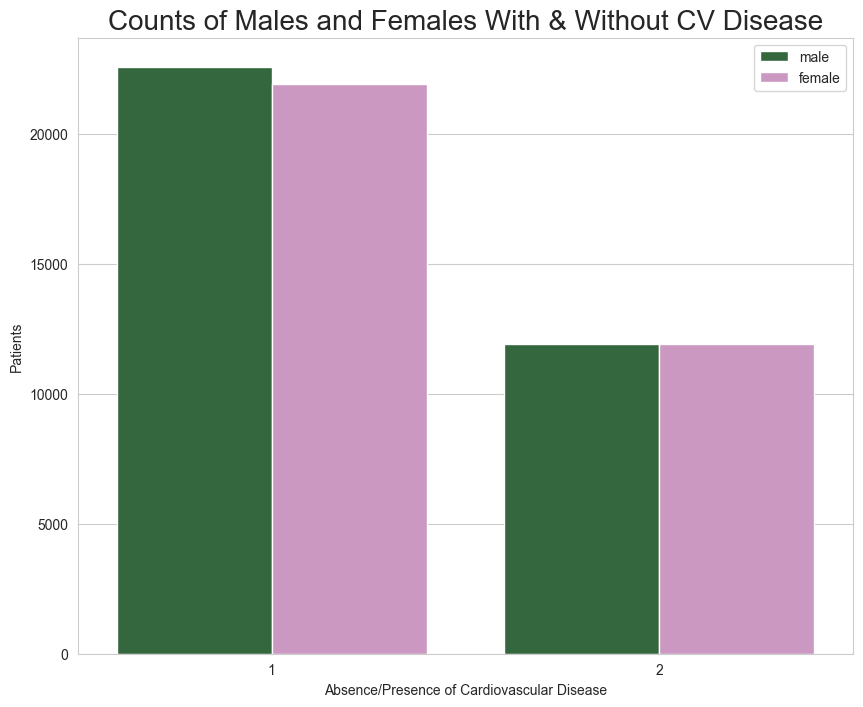

In [28]:
legend_labels = ['male', 'female']

plt.figure(figsize= (10, 8))
plt.title('Counts of Males and Females With & Without CV Disease', fontsize= 20)
sns.countplot(x= 'gender', hue= 'cardio', data= df_eda, palette= 'cubehelix')
plt.xlabel('Absence/Presence of Cardiovascular Disease')
plt.legend(legend_labels)
plt.ylabel('Patients')

In [29]:
df_eda.groupby('gender')['cardio'].mean()

gender
1    0.492826
2    0.499832
Name: cardio, dtype: float64

#### Cholesterol analysis

Text(0, 0.5, '# of Patients')

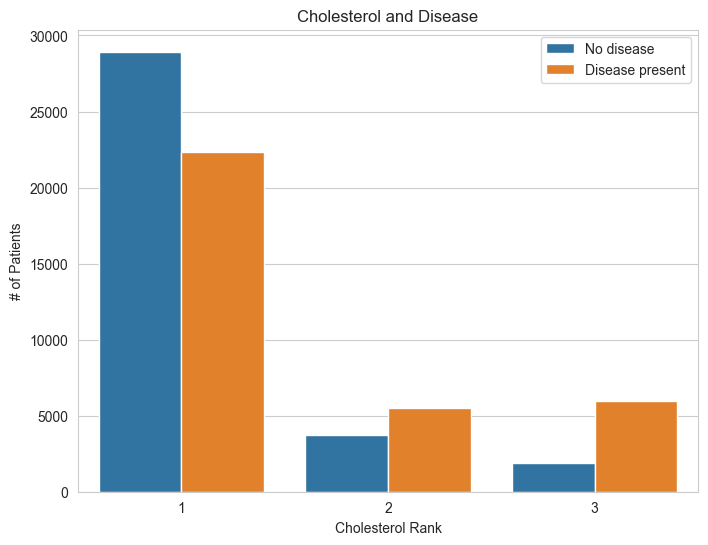

In [30]:
df_eda.cholesterol.value_counts(normalize= True)

plt.figure(figsize= (8,6))
sns.countplot(x= 'cholesterol', hue= 'cardio', data= df_eda)
plt.legend( ['No disease', 'Disease present'])
plt.title('Cholesterol and Disease')
plt.xlabel('Cholesterol Rank')
plt.ylabel('# of Patients')

Text(9.444444444444445, 0.5, 'Has Disease')

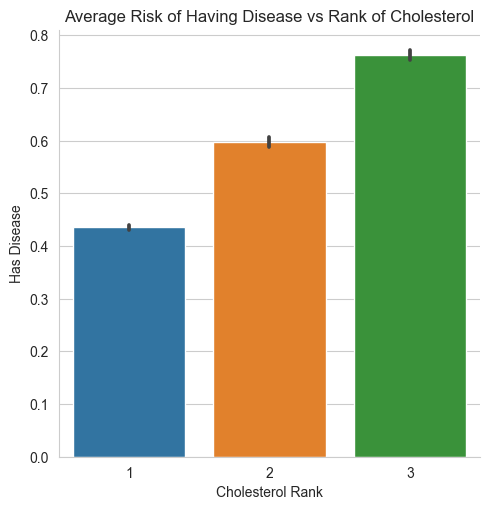

In [31]:
sns.catplot(x= 'cholesterol', y= 'cardio', data= df_eda, kind= 'bar'
        )
plt.title('Average Risk of Having Disease vs Rank of Cholesterol')
plt.xlabel('Cholesterol Rank')
plt.ylabel('Has Disease')

In [32]:
df_eda.groupby('cholesterol')['cardio'].mean()

cholesterol
1    0.435971
2    0.597237
3    0.762420
Name: cardio, dtype: float64

#### Activity analysis

In [33]:
df_eda.active.value_counts(normalize= True)

active
1    0.803458
0    0.196542
Name: proportion, dtype: float64

<Figure size 1200x1000 with 0 Axes>

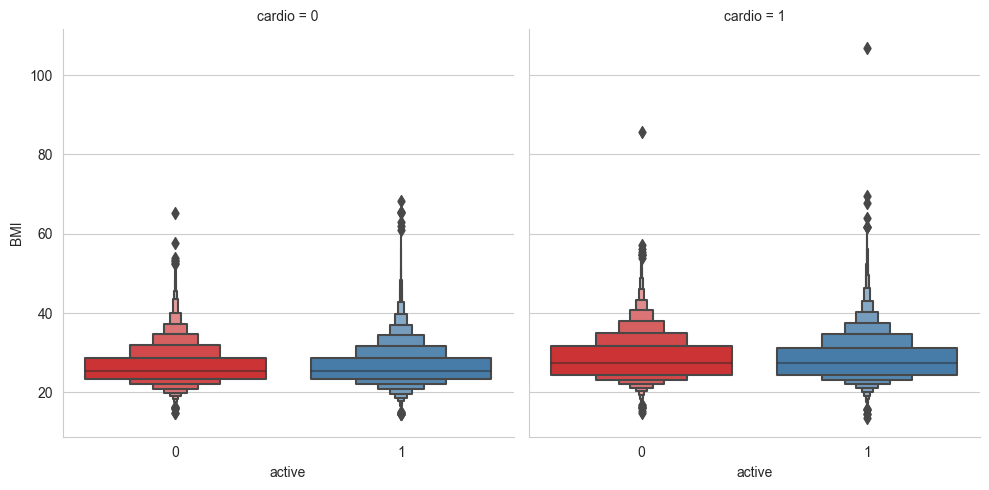

In [34]:
plt.figure(figsize= (12, 10))
sns.catplot(x='active', y='BMI', col='cardio', data=df_eda, kind='boxen', 
            palette='Set1')

In [35]:
df_eda.groupby(['cardio', 'active'])['BMI'].mean()

cardio  active
0       0         26.521442
        1         26.460297
1       0         28.540764
        1         28.436058
Name: BMI, dtype: float64

#### Glucose analysis

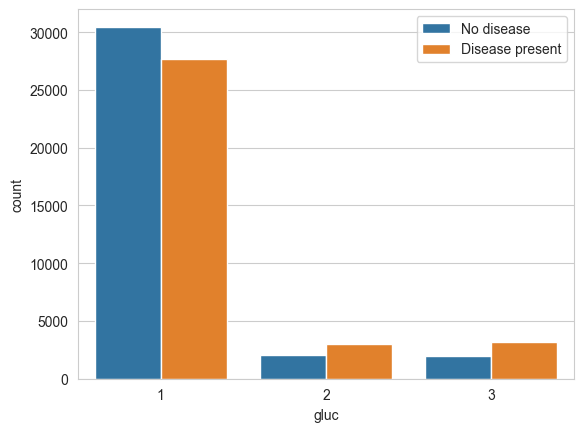

In [36]:
sns.countplot(x= 'gluc', hue= 'cardio', data= df_eda)
plt.legend( ['No disease', 'Disease present'])

In [37]:
df_eda.groupby('gluc')['cardio'].mean()

gluc
1    0.476171
2    0.589378
3    0.617528
Name: cardio, dtype: float64

#### alcohol and smoke analysis

In [38]:
df_eda.groupby(['alco', 'smoke'])['cardio'].mean()

alco  smoke
0     0        0.497266
      1        0.481851
1     0        0.514054
      1        0.440377
Name: cardio, dtype: float64

In [39]:
df_eda.groupby(['alco', 'smoke'])['cardio'].count()

alco  smoke
0     0        60545
      1         4215
1     0         1850
      1         1803
Name: cardio, dtype: int64

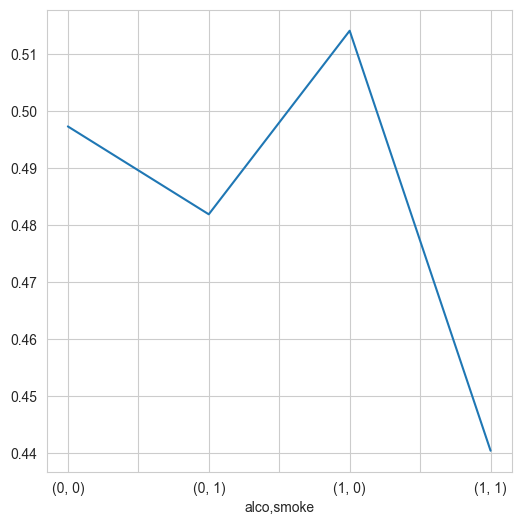

In [40]:
fig= plt.figure(figsize= (6,6))
al_smo = df_eda.groupby(['alco', 'smoke'])['cardio'].mean().plot()

### Model

#### Split data

In [41]:
df['cholesterol'] = df['cholesterol'].astype('category')
df['gluc'] = df['gluc'].astype('category')

df = pd.get_dummies(df, prefix=['chol', 'gluc'], drop_first=True)

y = df['cardio']
X = df.drop('cardio', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
y_test.shape

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### building models

In [42]:
# instantiate classifiers for vanilla models
classifiers = {
    'Logistic Regression' : LogisticRegression(), 
    'Random Forest' : RandomForestClassifier(), 
    'Support Vector Machine' : SVC(), 
    'K-Nearest Neighbors' : KNeighborsClassifier(), 
    'Decision Tree' : DecisionTreeClassifier(), 
}

In [43]:
results = pd.DataFrame(columns= ['Train_accuracy', 'Test_accuracy', 'F1_score', 
                                'False_Negative', 'True_Positive'])

# predict, get accuracy and f1 scores and add to dataframe
conf_matrices = []
for key, value in classifiers.items():
    value.fit(X_train, y_train)
    train_pred = value.predict(X_train)
    y_pred = value.predict(X_test)
    
    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    conf_matrices.append(cm)

    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(f1, 2), round(FN, 0), round(TP, 0)]

In [ ]:
results.sort_values(by= ['F1_score', 'False_Negative'], ascending= False)

#### Hyperparameter Tuning

In [ ]:
def get_results(model, model_name):
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))
    
    # get confusion matrix
    plot_confusion_matrix(model, X_test, y_test, cmap= "Blues", values_format= '.5g')
    plt.grid(False)
    plt.show()
    
    # get accuracy and F1 scores
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    
    # save measurements into results df
    results.loc[model_name] = [round(train_acc, 2), round(test_acc, 2), 
                               round(f1, 2), round(FN, 0), round(TP, 0)]

#### random forest

In [ ]:
RF = RandomForestClassifier()

In [ ]:
param_grid_RF = {
    'n_estimators' : [200],
    'max_depth' : [100], 
    'min_samples_split' : [5, 8], 
    'min_samples_leaf' : [3],
    'class_weight' : [{1 : 1.5}, {1 : 1.7}]
}

# Instantiate Randomized Search
RS_RF = RandomizedSearchCV(RF, param_grid_RF, n_iter= 20, scoring= 'recall', 
                           random_state= 42)

In [ ]:
RS_RF.fit(X_train, y_train)

In [ ]:
RS_RF.best_params_

In [ ]:
get_results(RS_RF, 'RS Random Forest')